In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
X_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(X_data))

In [5]:
noise.shape

(1000000,)

In [6]:
# y = mx + b

In [7]:
y_true = (0.5 * X_data) + 5 + noise

In [8]:
x_df = pd.DataFrame(data = X_data,columns=['X Data'])

In [9]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [10]:
y_df.head()

,Y
0,6.813535
1,6.053477
2,5.541898
3,4.410819
4,4.777153


In [11]:
my_data = pd.concat([x_df,y_df],axis=1)

In [12]:
my_data.head()

,X Data,Y
0,0.00000,6.813535
1,0.00001,6.053477
2,0.00002,5.541898
3,0.00003,4.410819
4,0.00004,4.777153


In [13]:
my_data.sample(n=250)

,X Data,Y
243243,2.432432,5.817477
990018,9.900190,11.406724
764347,7.643478,8.896461
226053,2.260532,7.692620
565688,5.656886,8.305856
191072,1.910722,3.658712
210913,2.109132,7.281594
669609,6.696097,7.904554
351887,3.518874,5.492796
959272,9.592730,12.078271


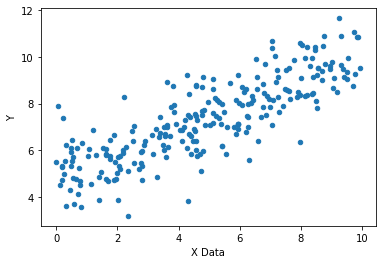

In [14]:
my_data.sample(n=250).plot(kind='scatter',x = 'X Data',y = 'Y')

In [15]:
batch_size = 8

In [16]:
np.random.randn(2)

array([-0.06993403,  1.42173947])

In [17]:
m = tf.Variable(0.53237955)
b = tf.Variable(0.77836218)

In [18]:
X_placeholder = tf.placeholder(tf.float32,[batch_size])

In [19]:
y_placeholder = tf.placeholder(tf.float32,[batch_size])

In [20]:
y_model = m * X_placeholder + b

In [21]:
error = tf.reduce_sum(tf.square(y_placeholder - y_model))

In [22]:
optimizer = tf.train.GradientDescentOptimizer(0.001)

In [23]:
train = optimizer.minimize(error)

In [24]:
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 100000
    
    for i in range(epochs):
        
        rand_ind = np.random.randint(len(X_data),size = batch_size)
        
        feed = {X_placeholder: X_data[rand_ind], y_placeholder: y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [26]:
model_m

0.4882011

In [27]:
model_b

4.9875016

In [28]:
# y = xm + b
y_hat = X_data * model_m + model_b

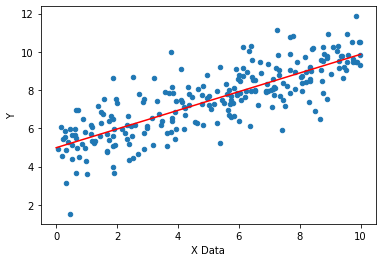

In [29]:
my_data.sample(250).plot(kind='scatter',x = 'X Data', y= 'Y')
plt.plot(X_data,y_hat, 'r')

## Tf Estimator Regression

In [30]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [31]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Janne\\AppData\\Local\\Temp\\tmp9oaq1u7y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001567017CC88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_true, test_size=0.3, random_state=42)

In [34]:
print(X_train.shape)

(700000,)


In [35]:
print(X_test.shape)

(300000,)


In [36]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [37]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [38]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [39]:
estimator.train(input_fn = input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Janne\AppData\Local\Temp\tmp9oaq1u7y\model.ckpt.
INFO:tensorflow:loss = 458.43713, step = 0
INFO:tensorflow:global_step/sec: 562.125
INFO:tensorflow:loss = 38.17749

In [40]:
train_metric = estimator.evaluate(input_fn = train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-10T18:18:43Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Janne\AppData\Local\Temp\tmp9oaq1u7y\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-05-10-18:18:45
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0980306, global_step = 1000, label/mean = 7.50448

In [41]:
test_metric = estimator.evaluate(test_input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-10T18:18:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Janne\AppData\Local\Temp\tmp9oaq1u7y\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-05-10-18:18:47
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0525736, global_step = 1000, label/mean = 7.473803, loss = 8.4205885, prediction/mean = 7.3451586
INFO:tensorflow:Saving 'checkpoint_pat

In [42]:
print('training metrics:')
print(train_metric)

training metrics:
{'average_loss': 1.0980306, 'label/mean': 7.504489, 'loss': 8.784245, 'prediction/mean': 7.359688, 'global_step': 1000}


In [43]:
print('testing metrics:')
print(test_metric)

testing metrics:
{'average_loss': 1.0525736, 'label/mean': 7.473803, 'loss': 8.4205885, 'prediction/mean': 7.3451586, 'global_step': 1000}


In [44]:
brand_new_data = np.linspace(0,10,10)

In [45]:
in_fun_pred = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [46]:
list(estimator.predict(input_fn=in_fun_pred))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Janne\AppData\Local\Temp\tmp9oaq1u7y\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.444725], dtype=float32)},
 {'predictions': array([5.0935426], dtype=float32)},
 {'predictions': array([5.74236], dtype=float32)},
 {'predictions': array([6.391177], dtype=float32)},
 {'predictions': array([7.039995], dtype=float32)},
 {'predictions': array([7.6888123], dtype=float32)},
 {'predictions': array([8.337629], dtype=float32)},
 {'predictions': array([8.986447], dtype=float32)},
 {'predictions': array([9.635265], dtype=float32)},
 {'predictions': array([10.284082], dtype=float32)}]

In [47]:
predictions = []

for pred in estimator.predict(input_fn=in_fun_pred):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Janne\AppData\Local\Temp\tmp9oaq1u7y\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [48]:
predictions

[array([4.444725], dtype=float32),
 array([5.0935426], dtype=float32),
 array([5.74236], dtype=float32),
 array([6.391177], dtype=float32),
 array([7.039995], dtype=float32),
 array([7.6888123], dtype=float32),
 array([8.337629], dtype=float32),
 array([8.986447], dtype=float32),
 array([9.635265], dtype=float32),
 array([10.284082], dtype=float32)]

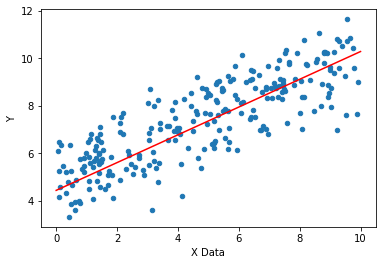

In [49]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y= 'Y')
plt.plot(brand_new_data,predictions,'r')